In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [8]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:47<00:00, 25.3MB/s]
100% 1.06G/1.06G [00:47<00:00, 24.1MB/s]


In [9]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [19]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [11]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = "inferred",
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = "inferred",
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [12]:
# Normalize
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [20]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [22]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [23]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 72s 108ms/step - loss: 1.4226 - accuracy: 0.5894 - val_loss: 0.5901 - val_accuracy: 0.6942
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5560 - accuracy: 0.7187 - val_loss: 0.5704 - val_accuracy: 0.7066
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4612 - accuracy: 0.7831 - val_loss: 0.5062 - val_accuracy: 0.7642
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3993 - accuracy: 0.8259 - val_loss: 0.6961 - val_accuracy: 0.6966
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3517 - accuracy: 0.8496 - val_loss: 0.4372 - val_accuracy: 0.7962
Epoch 6/10
625/625 [==============================] - 69s 110ms/step - loss: 0.2928 - accuracy: 0.8770 - val_loss: 0.4567 - val_accuracy: 0.8106
Epoch 7/10
625/625 [==============================] - 68s 107ms/step - loss: 0.2030 - accuracy: 0.9206 - val_loss: 0.7477 - val_ac

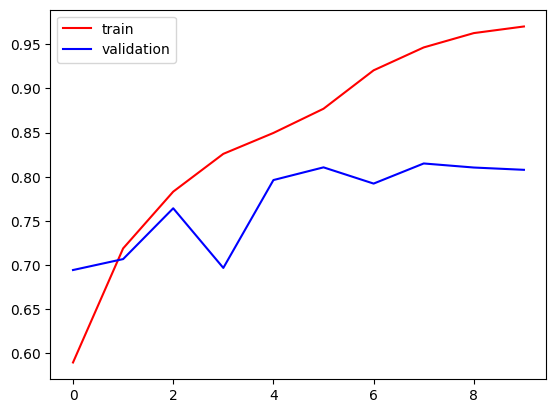

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

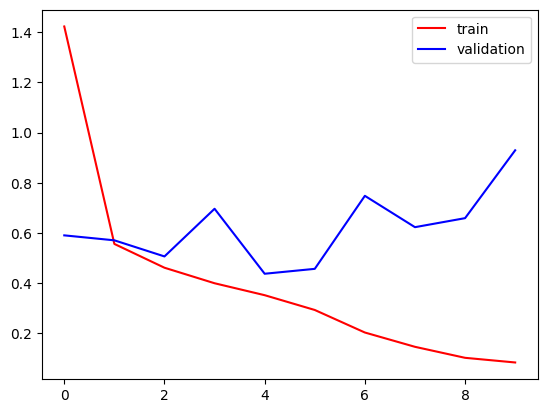

In [25]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

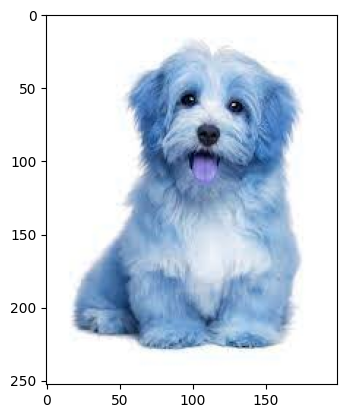

In [27]:
import cv2

test_img = cv2.imread('/content/dog.jpg')
plt.imshow(test_img)

In [29]:
test_img.shape

(253, 199, 3)

In [30]:
test_img = cv2.resize(test_img,(256,256))

In [31]:
test_input = test_img.reshape((1,256,256,3))

In [32]:
model.predict(test_input)

1/1 [==============================] - 0s 292ms/step


array([[1.]], dtype=float32)

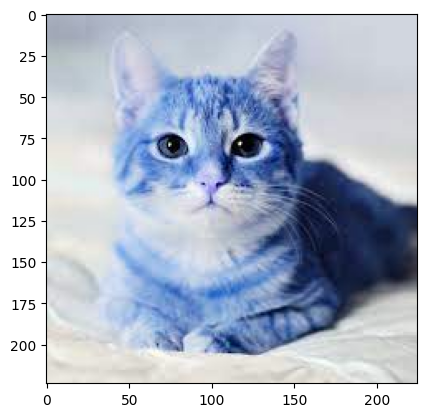

In [33]:
test_img_2 = cv2.imread('/content/cat.jpg')
plt.imshow(test_img_2)

In [34]:
test_img_2.shape


(224, 225, 3)

In [35]:
test_img_2 = cv2.resize(test_img_2,(256,256))

In [36]:
test_input = test_img_2.reshape((1,256,256,3))

In [37]:
model.predict(test_input)

1/1 [==============================] - 0s 30ms/step


array([[0.]], dtype=float32)